##### duration: 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
import logging
logging.basicConfig(level=logging.INFO)
print(sys.executable)

/n/groups/datta/tim_sainburg/conda_envs/kpms/bin/python3


### Get recording info (google sheets)

In [3]:
import requests
import pandas as pd
from io import BytesIO

INFO:numexpr.utils:Note: NumExpr detected 48 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


In [4]:
# spreadsheet_url = 'https://docs.google.com/spreadsheet/ccc?key=14HIqUaSl_n-91hpAvmACY_iVY9nLKdlA6qklhxfZon0&output=csv&gid=0'
spreadsheet_url = "https://docs.google.com/spreadsheet/ccc?key=1jACsUmxuJ9Une59qmvzZGc1qXezKhKzD1zho2sEfcrU&output=csv&gid=0"
response = requests.get(spreadsheet_url)
recording_df = pd.read_csv(BytesIO(response.content))

In [5]:
recording_df[:3]

,Subject,duration_m,video_recording_id,ephys_id,calibration_id,calibration_board_shape,calibration_square_size,video_location_on_o2,ephys_location_on_o2,calibration_location_on_o2,samplerate
0,M04002,10,24-05-01-13-26-43-110846,2024-05-01_13-26-37,24-05-01-13-45-07-825493,NaN,NaN,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,150


### Run

In [6]:
for idx, recording_row in recording_df.iterrows():
    break

In [7]:
output_directory = Path("/n/groups/datta/tim_sainburg/datasets/scratch/") / "240806-3d-pipeline"

In [8]:
output_directory

PosixPath('/n/groups/datta/tim_sainburg/datasets/scratch/240806-3d-pipeline')

In [9]:
output_directory_egocentric_alignment = output_directory / 'egocentric_alignment' / recording_row.video_recording_id
output_directory_egocentric_alignment.mkdir(parents=True, exist_ok=True)

In [11]:
from multicamera_airflow_pipeline.tim_240731.keypoints.alignment.egocentric_alignment import EgocentricAligner 

INFO:multicamera_airflow_pipeline.tim_240731.keypoints.alignment.egocentric_alignment:Python interpreter binary location: /n/groups/datta/tim_sainburg/conda_envs/kpms/bin/python3


In [12]:
!ls {output_directory}

2D_predictions	    camera_sync		  openephys_sync      triangulation
arena_alignment     egocentric_alignment  size_normalization
camera_calibration  gimbal		  spikesorting


In [13]:
!ls { output_directory / 'size_normalization' / recording_row.video_recording_id}

size_norm_angles.float32.90009x25x3.mmap  size_norm.float32.90009x25x3.mmap


In [14]:
predictions_3d_file = list(
    (output_directory / "size_normalization" / recording_row.video_recording_id).glob(
        "size_norm.*.mmap"
    )
)[0]

In [30]:
egocentric_aligner = EgocentricAligner(
    predictions_3d_file = predictions_3d_file,
    egocentric_alignment_output_directory = output_directory_egocentric_alignment / "rigid",
    alignment_method="rigid"
)

INFO:multicamera_airflow_pipeline.tim_240731.keypoints.alignment.egocentric_alignment:Python interpreter binary location: /n/groups/datta/tim_sainburg/conda_envs/kpms/bin/python3
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.alignment.egocentric_alignment:Output directory: /n/groups/datta/tim_sainburg/datasets/scratch/240806-3d-pipeline/egocentric_alignment/24-05-01-13-26-43-110846/rigid


In [31]:
egocentric_aligner.run()

INFO:multicamera_airflow_pipeline.tim_240731.keypoints.alignment.egocentric_alignment:Running alignment method: rigid
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.alignment.egocentric_alignment:	 Data length: 90009
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.alignment.egocentric_alignment:initializing output


  0%|          | 0/5 [00:00<?, ?it/s]

In [39]:
egocentric_aligner = EgocentricAligner(
    predictions_3d_file = predictions_3d_file,
    egocentric_alignment_output_directory = output_directory_egocentric_alignment / "nonrigid",
    alignment_method="nonrigid"
)

INFO:multicamera_airflow_pipeline.tim_240731.keypoints.alignment.egocentric_alignment:Output directory: /n/groups/datta/tim_sainburg/datasets/scratch/240806-3d-pipeline/egocentric_alignment/24-05-01-13-26-43-110846/nonrigid


In [40]:
egocentric_aligner.run()

INFO:multicamera_airflow_pipeline.tim_240731.keypoints.alignment.egocentric_alignment:Running alignment method: nonrigid
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.alignment.egocentric_alignment:	 Data length: 90009
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.alignment.egocentric_alignment:initializing output


performing alignment:   0%|          | 0/5 [00:00<?, ?it/s]

In [42]:
!ls {output_directory_egocentric_alignment}

nonrigid  rigid


In [34]:
!ls {output_directory_egocentric_alignment / 'rigid'}

completed.txt					    poses_after_alignment.png
egocentric_alignment_rigid.float32.90009x25x3.mmap  poses_before_alignment.png


In [36]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

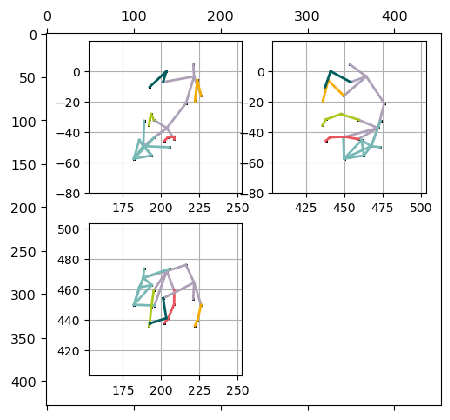

In [37]:
img = mpimg.imread(output_directory_egocentric_alignment / 'rigid' / 'poses_before_alignment.png')
plt.matshow(img)

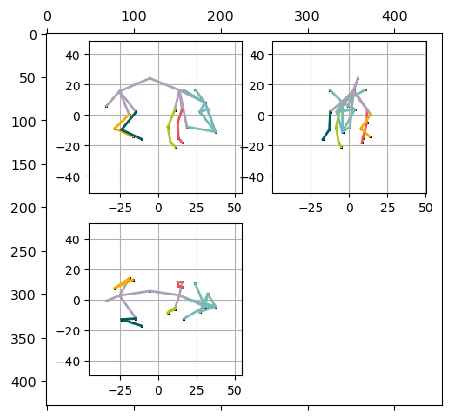

In [38]:
img = mpimg.imread(output_directory_egocentric_alignment / 'rigid' / 'poses_after_alignment.png')
plt.matshow(img)

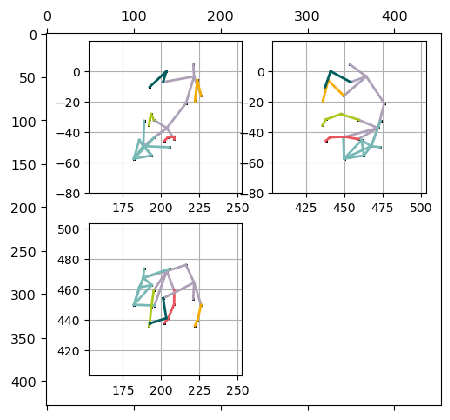

In [43]:
img = mpimg.imread(output_directory_egocentric_alignment / 'nonrigid' / 'poses_before_alignment.png')
plt.matshow(img)

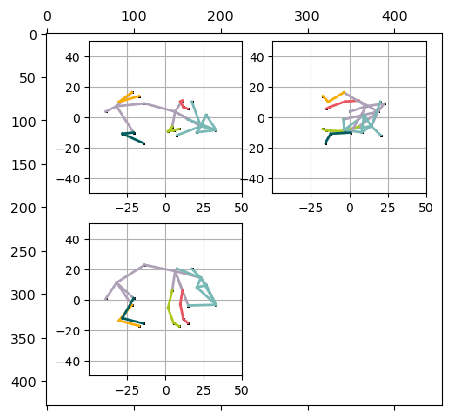

In [44]:
img = mpimg.imread(output_directory_egocentric_alignment / 'nonrigid' / 'poses_after_alignment.png')
plt.matshow(img)